# DBSCAN Clustering mit Python
### Präsentation von Ellen Kistner und Lais Lemke

In diesem Jupyter Notebook zeigen wir, wie der DBSCAN-Algorithmus verwendet wird, um Cluster in einem Datensatz zu identifizieren. 
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN steht für *Density-Based Spatial Clustering of Applications with Noise* und ist eine beliebte Methode, um Cluster zu finden. 

## Originärer Einsatzbereich
DBSCAN wurde ursprünglich für die Analyse von räumlichen (geografischen) Datenbanken entwickelt. Das Ziel war es, Cluster in großen, räumlichen Datensätzen zu identifizieren, insbesondere solche, die nicht kugelförmig sind, sowie "Rauschen" (Noise) in den Daten zu erkennen.

## Funktionsweise und Kernidee
Die Kernidee von DBSCAN besteht darin, Cluster als dichte Regionen von Datenpunkten in einem Datensatz zu identifizieren und Punkte außerhalb dieser dichten Regionen als Rauschen (Noise) zu klassifizieren. DBSCAN clustert die Daten häufig auf eine Weise, die der menschlichen Intuition entspricht, indem es Gruppen von dicht beieinanderliegenden Punkten zu Clustern zusammenfasst und isolierte Punkte als Ausreißer behandelt. Anstatt eine bestimmte Anzahl von Clustern vorzugeben oder nur kugelförmige Cluster zu erkennen, sucht DBSCAN nach natürlichen Gruppierungen von Punkten, basierend auf ihrer Dichte und ihrer Nähe zueinander.

### Wichtige Begriffe:
1. **Nachbarschaftsprüfung:** Für jeden Punkt im Datensatz wird geprüft, wie viele Nachbarn er in einem Umkreis von `eps` hat (Nachbarschaftsbereich).
2. **Kernpunkte:** Punkte, die mindestens `min_samples` Nachbarn in ihrer `eps`-Nachbarschaft haben, werden als **Kernpunkte** definiert. Diese Punkte sind potenzielle Zentren von Clustern.
3. **Randpunkte:** Punkte, die weniger als `min_samples` Nachbarn haben, aber sich innerhalb der `eps`-Umgebung eines Kernpunkts befinden, werden als **Randpunkte** klassifiziert.
4. **Rauschen (Noise):** Punkte, die weder Kernpunkte noch Randpunkte sind, werden als **Rauschen** oder **Outliers** betrachtet
5. **Cluster-Bildung:** Cluster entstehen, wenn Kernpunkte direkt oder indirekt miteinander verbunden sind, d.h., wenn sie über andere Kernpunkte erreichbar sind.


## Vorteile
- **Keine Vorgabe der Clusteranzahl nötig:** Im Gegensatz zu anderen Clustering-Algorithmen wie K-Means muss die Anzahl der Cluster nicht im Voraus angegeben werden.
- **Erkennung von Clustern beliebiger Form:** DBSCAN kann Cluster von beliebiger Form und Dichte erkennen, da es nicht auf kugelförmige Cluster beschränkt ist.
- **Outlier-Erkennung:** DBSCAN identifiziert automatisch Ausreißer oder Rauschen, die nicht zu Clustern gehören.
- **Skalierbarkeit:** Der Algorithmus ist effizient für große Datensätze und funktioniert gut in großen räumlichen Datenbanken.

## Nachteile
- **Wahl der Parameter:** Die Wahl der Parameter `eps` und `min_samples` ist entscheidend und kann je nach Datensatz schwierig sein.
- **Probleme bei variierenden Dichten:** DBSCAN funktioniert nicht gut, wenn die Dichte der Cluster stark variiert, da für alle Cluster dieselben Parameter verwendet werden.
- **Speicheranforderungen:** Der Algorithmus kann für sehr große Datensätze speicherintensiv sein, insbesondere wenn der Datensatz nicht effizient gespeichert oder verarbeitet wird.


## Wichtige Parameter
- `eps` (`epsilon`): Maximale Entfernung, die zwei Punkte voneinander haben dürfen, um als Nachbarn zu gelten, kann als Radium um einen Punkt gesehen werden. Alle Punkte, die in diesem Radius sind, sind Nachbarn. 
- `min_samples`: Minimale Anzahl von Punkten (Nachbarn) in einem Umkreis von `eps`, die notwendig ist, um einen Cluster zu bilden.

In [13]:
# Hier werden notwendige Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets


## Datengenerierung

Wir verwenden den `make_moons` Datensatz aus der `sklearn`-Bibliothek, der zwei halbmondförmige Cluster erzeugt. Dies eignet sich gut, um zu zeigen, wie DBSCAN mit Clustern arbeitet. Augenscheinlich kann man in diesem Datensatz zwei Halbmonde erkennen diese sollen nun auch als solche geclustert werden. 

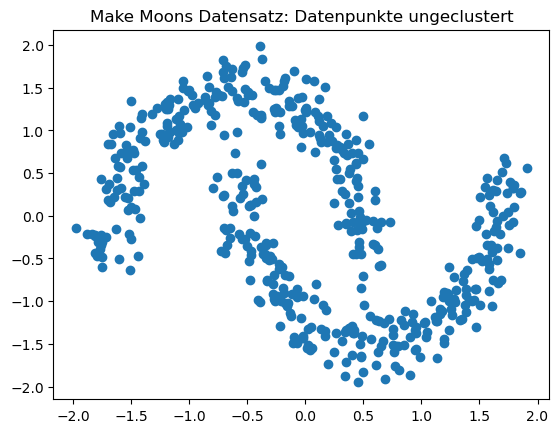

In [14]:
# Der Datensatz ("Make Moons") mit Rauschen wird generiert
# n_samples: Anzahl der Datenpunkte = 500
# noise: Hinzufügen von zufälligem Rauschen für realistischere Daten = 0.1
X, _ = make_moons(n_samples=500, noise=0.1)
# Die Daten müssen standardisiert werden, um sie auf eine einheitliche Skala zu bringen
# Die StandardScaler Funktion entfernt den Mittelwert und skaliert die Daten auf eine Standardabweichung von 1
X = StandardScaler().fit_transform(X)

# Die Daten aus dem Makemoon Datensatz werden in einem Streudiagramm geplottet
plt.scatter(X[:, 0], X[:, 1]) #zwei Dimensionen
plt.title("Make Moons Datensatz: Datenpunkte ungeclustert")
plt.show()


## DBSCAN Clustering

Nun wenden wir den DBSCAN-Algorithmus auf den Datensatz an.
Wir wählen den Radius um jeden Datenpunkt `eps=0.2` und als Mindestanzahl von Datenpunkten in diesem Radius `min_samples=7`.


Text(0.5, 1.0, 'DBSCAN Clustering')

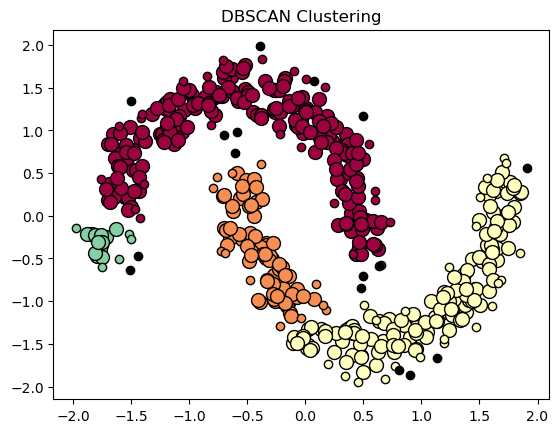

In [15]:
# Zuerst definieren wir unser DBSCAN-Modell.
dbscan = DBSCAN(eps=0.2, min_samples=7)

# Jetzt lassen wir den Algorithmus auf unseren Datensatz X los.
# Dabei versucht DBSCAN, Cluster zu identifizieren, indem es die Punkte analysiert.
# Das Ergebnis ist eine Liste von Labels:
# - Jeder Punkt erhält ein Label, das seinem Cluster zugeordnet ist (z. B. 0, 1, 2, ...).
# - Punkte, die zu keinem Cluster gehören, bekommen das spezielle Label -1 und werden als Ausreißer behandelt.
labels = dbscan.fit_predict(X)

# Nun möchten wir herausfinden, welche Punkte "Kernpunkte" sind.
# Kernpunkte sind die zentralen Punkte eines Clusters, die genügend Nachbarn haben, um den Cluster zu definieren.
# Dafür erstellen wir ein Array, das für jeden Punkt speichert, ob er ein Kernpunkt ist oder nicht.
core_samples_mask = np.zeros_like(labels, dtype=bool)
# Mit den vom Algorithmus identifizierten Kernpunkt-Indizes markieren wir diese Punkte in unserem Array.
core_samples_mask[dbscan.core_sample_indices_] = True

# Als nächstes möchten wir uns einen Überblick über die gefundenen Cluster verschaffen.
# Dazu sammeln wir alle einzigartigen Cluster-Labels in einer Menge.
# Cluster-Labels sind normalerweise Zahlen (z. B. 0, 1, 2), während -1 speziell für Ausreißer verwendet wird.
unique_labels = set(labels)

# Damit wir die Cluster später in einem Diagramm darstellen können, brauchen wir Farben.
# Hier nutzen wir eine Farbkarte, die jedem Cluster eine eigene Farbe zuweist.
# Wir generieren dabei so viele Farben, wie wir Cluster (einschließlich Ausreißer) haben.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Jetzt visualisieren wir die Cluster.
# Dafür gehen wir durch jedes Cluster und zeichnen die Punkte, die zu diesem Cluster gehören.
for k, col in zip(unique_labels, colors):
    # Wenn das Label -1 ist, handelt es sich um Ausreißer.
    # Ausreißer werden in unserem Diagramm in Schwarz dargestellt.
    if k == -1:
        col = 'k'

    # Wir erstellen eine Maske, um die Punkte zu finden, die zum aktuellen Cluster gehören.
    # Diese Maske sagt: "Gehört der Punkt zu Cluster k? Ja oder Nein."
    class_member_mask = (labels == k)

    # Jetzt zeichnen wir zuerst die Kernpunkte des Clusters.
    # Das sind die Punkte, die innerhalb des Clusters zentral liegen und die Clusterstruktur definieren.
    # Kernpunkte heben wir durch größere Marker hervor.
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

    # Danach zeichnen wir die Randpunkte des Clusters.
    # Das sind Punkte, die zwar zum Cluster gehören, aber weniger Nachbarn haben und daher
    # nicht als Kernpunkte betrachtet werden.
    # Diese Punkte markieren wir mit kleineren Markern.
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Zu guter Letzt geben wir unserem Diagramm einen Titel, damit klar ist, was dargestellt wird.
plt.title('DBSCAN Clustering')

# Und jetzt zeigen wir das fertige Diagramm an.
# Es wird die gefundenen Cluster, Kernpunkte, Randpunkte und Ausreißer anzeigen.


## Visualisierung der Ergebnisse

In der oberen Grafik sind Punkte, die zu einem Cluster gehören, farblich markiert. Punkte, die keine Nachbarn haben (also Rauschen oder "Noise" sind), werden in schwarz bzw. im Dark Modus in weiß dargestellt. Aktuell wird der obere Mond noch nicht als ganzer Mond erkannt, dies liegt an den gewählten Parametern.

Durch Anpassung von `eps` und `min_samples` können unterschiedliche Clustermuster erzeugt werden. Dies ist in der nächsten Funktion gut einzusehen. Der Wert `eps` verändert den Radius um jeden Punkt und bestimmt, wie weit zwei Punkte voneinander entfernt sein dürfen, um als Teil desselben Clusters zu gelten. Der Wert `min_samples` bestimmt die Mindestanzahl von Punkten, die in einem Cluster vorhanden sein müssen. 


---

## Veränderungen durch `eps`:

### Kleiner `eps`-Wert:
- **Nur nahegelegene Punkte** werden als Nachbarn betrachtet.

#### Effekt:
- Es entstehen **viele kleine Cluster** oder sogar **keine Cluster**.
- Punkte, die in Wahrheit zu einem Cluster gehören, könnten **als Ausreißer klassifiziert** werden.
- Kann zu einer **niedrigeren Genauigkeit** führen, wenn echte Cluster zerteilt werden.

### Großer `eps`-Wert:
- **Mehr Punkte** werden als Nachbarn betrachtet, auch wenn sie weiter voneinander entfernt sind.

#### Effekt:
- Cluster können **zu groß werden** oder sich **überschneiden**.
- Punkte, die eigentlich Ausreißer sind, könnten **fälschlicherweise zu einem Cluster hinzugefügt** werden.
- Kann ebenfalls die **Genauigkeit senken**, da Cluster unpräzise werden.

---

## Veränderungen durch `min_samples`:

### Kleiner `min_samples`-Wert:
- Cluster können aus **wenigen Punkten bestehen**.

#### Effekt:
- Es entstehen **viele kleine Cluster**.
- **Rauschen (Ausreißer)** wird fälschlicherweise als Cluster erkannt.
- Kann die **Genauigkeit verschlechtern**, da echte Cluster nicht gut repräsentiert werden.

### Großer `min_samples`-Wert:
- **Mehr Punkte** sind erforderlich, um einen Cluster zu bilden.

#### Effekt:
- **Kleine oder spärliche Cluster** werden ignoriert oder **als Ausreißer klassifiziert**.
- Kann zu einer **höheren Präzision** führen, da nur dichte Cluster erkannt werden.
- Gleichzeitig können echte Cluster mit wenigen Punkten **übersehen werden**, was die **Vollständigkeit** senkt.

---

## Wechselwirkung von `eps` und `min_samples`:

### Kleine `eps` und große `min_samples`:
- **Strenge Clusterbildung**: Nur dichte und kompakte Cluster werden erkannt.

#### Effekt:
- Kann zu **hoher Präzision**, aber **niedrigem Recall** führen.

### Große `eps` und kleine `min_samples`:
- **Tolerantere Clusterbildung**: Viele Datenpunkte werden zu Clustern zusammengefasst.

#### Effekt:
- Kann zu **höherem Recall**, aber **niedriger Präzision** führen.


---

Um den Einfluss der Wahl der beiden Parameter zu visualisieren haben wir eine interaktive Funktion erstellt, die es ermöglicht, den `eps`- und `min_samples`-Wert zu ändern und die Auswirkungen auf die Clusterbildung zu beobachten:


In [16]:
# Funktion zur Visualisierung des DBSCAN-Algorithmus
def plot_dbscan(eps, min_samples):
    """
    Visualisiert die Auswirkungen der Parameter `eps` und `min_samples` auf die Clusterbildung
    und zeigt die Anzahl der erkannten Cluster im Diagramm an.
    
    Args:
        eps (float): Der Radius, innerhalb dessen Punkte als Nachbarn betrachtet werden.
        min_samples (int): Die Mindestanzahl von Punkten, um einen Cluster zu bilden.
    """
    # Zuerst erstellen wir ein DBSCAN-Modell mit den angegebenen Parametern.
    # Der Algorithmus wird dann auf den Datensatz `X` angewendet.
    # Ergebnis: Jeder Punkt erhält ein Label, das angibt, zu welchem Cluster er gehört (oder -1 für Ausreißer).
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Wir berechnen die Anzahl der Cluster, die der Algorithmus erkannt hat.
    # Dazu zählen wir die eindeutigen Labels (ausgenommen -1, das für Ausreißer steht).
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Jetzt erstellen wir ein Diagramm, um die Cluster darzustellen.
    plt.figure(figsize=(6, 6))  # Ein quadratisches Diagramm für klare Visualisierung.

    # Wir erstellen eine Farbpalette, um jedem Cluster eine eigene Farbe zuzuweisen.
    unique_labels = set(labels)  # Alle eindeutigen Cluster-Labels (einschließlich -1 für Ausreißer).
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    # Nun iterieren wir über alle Cluster-Labels (einschließlich -1).
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Wenn das Label -1 ist, handelt es sich um Ausreißer.
            # Diese Punkte zeichnen wir in Schwarz.
            col = 'k'

        # Mit einer Maske filtern wir die Punkte, die zum aktuellen Cluster gehören.
        class_member_mask = (labels == k)

        # Die Punkte des aktuellen Clusters werden in das Diagramm gezeichnet.
        xy = X[class_member_mask]  # Punkte des aktuellen Clusters.
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                 markeredgecolor='k', markersize=6)

    # Nun fügen wir einen Titel hinzu, der die Parameter und die Anzahl der Cluster enthält.
    plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}\nAnzahl der Cluster: {n_clusters}')
    
    # Achsenbeschriftungen für eine bessere Lesbarkeit.
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    # Schließlich zeigen wir das Diagramm an.
    plt.show()

# Jetzt erstellen wir interaktive Schieberegler, um die Parameter dynamisch anzupassen.
# Der `eps_slider` ermöglicht es, den Radius (`eps`) zu verändern, innerhalb dessen Punkte als Nachbarn gelten.
eps_slider = widgets.FloatSlider(value=0.2, min=0.01, max=1.0, step=0.05, description='eps')

# Der `min_samples_slider` ermöglicht es, die Mindestanzahl von Punkten (`min_samples`) zu verändern.
min_samples_slider = widgets.IntSlider(value=5, min=1, max=30, step=1, description='min_samples')

# Beide Schieberegler werden nebeneinander dargestellt.
ui = widgets.HBox([eps_slider, min_samples_slider])

# Wir verbinden die Schieberegler mit unserer Funktion `plot_dbscan`.
# Dadurch wird das Diagramm jedes Mal aktualisiert, wenn ein Schieberegler bewegt wird.
out = widgets.interactive_output(plot_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider})

# Zum Schluss zeigen wir die Schieberegler und das Diagramm an.
display(ui, out)


Output()

### Ziel: 2 Cluster, eins pro Halbmond und so wenig Ausreißer wie möglich 
##### Beispiele die ihr ausprobieren könnt: 

| Ausgangswert | kleines min_sample                                                                               | mittelgroßes min_sample                                                     | großes min_sample                                                                                                                                                                                                                                  |
|---------------|--------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| kleines eps   | eps = 0.11, min_samples = 5 -> 26 Cluster; Problem hier: zu viele Cluster, da `eps` zu klein ist | eps = 0.11, min_samples = 8 -> 13 Cluster; viele kleine Cluster und Ausreißer | eps = 0.11, min_samples = 15 -> 0 Cluster; Problem: in einem Kleinen Radius (`eps`) sind keine vielen 15 Nachbar Punkte                                                                                                                            |
|               | eps = 0.3, min_samples = 5 -> 4 Cluster; Problem hier: `eps` immer noch zu klein                 |                                                                             |                                                                                                                                                                                                                                                    |
| mittleres eps | eps = 0.21 min_samples = 5 -> 2 Cluster --> unser Ziel ist erreicht                              | eps = 0.21, min_samples = 8 -> 3 Cluster  | eps = 0.21, min_samples = 15 -> 10 Cluster; Problem: zu viele Cluster durch zu großes `min_samples`                                                                                                                                                |
| großes eps    | eps = 0.51, min_samples = 5 -> 1 Cluster; Problem hier: zu wenig Cluster, da `eps` zu groß ist   | eps = 0.51, min_samples = 15 -> 1 Cluster; Problem: alle Punkte in einem Cluster `eps` und `min_samples` zu groß  | eps = 0.51, min_samples = 30 -> 2 Cluster;  `eps` groß aber dafür auf die Anforderung an  `min_samples` groß -> daher wenn proportional ähnlich wie kleines `eps` und kleines `min_samples`, wenn die Punkte des Datensatzes ähnlich verstreut sind |






